In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
%matplotlib inline

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [4]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

## Kernel

kernel parameters selects the type of hyperplane used to separate the data. Using 'linear' will use a linear hyperplane (a line in the case of 2D data). 'rbf' and 'poly' uses a non linear hyper-plane

In [5]:
kernels = ['linear', 'rbf', 'poly']

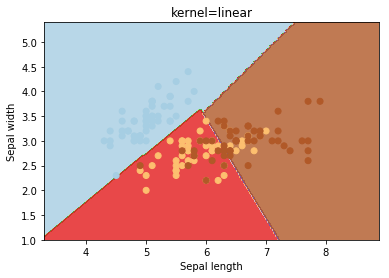

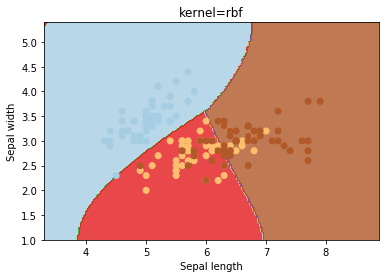

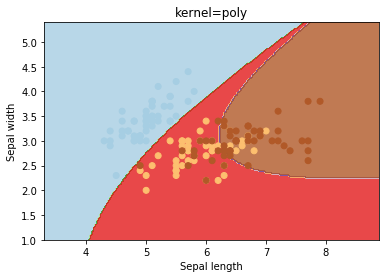

In [6]:
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))

## gamma

gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

In [7]:
gammas = [0.1, 1, 10, 100]

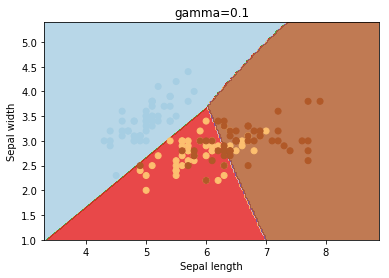

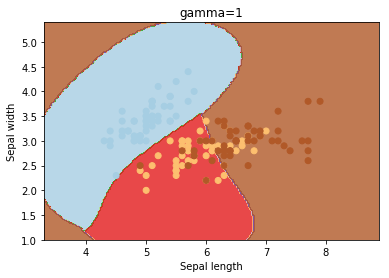

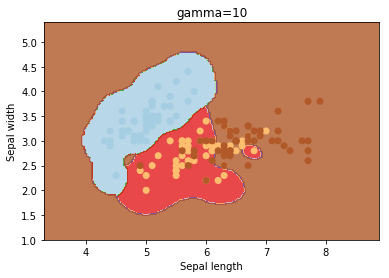

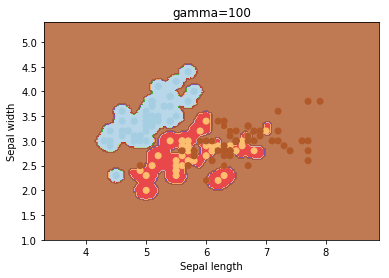

In [8]:
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma=' + str(gamma))

We can see that increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data

## C

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

In [9]:
cs = [0.1, 1, 10, 100, 1000]

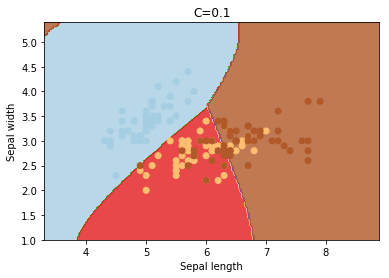

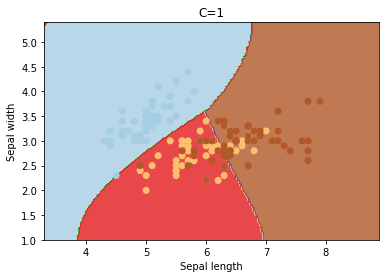

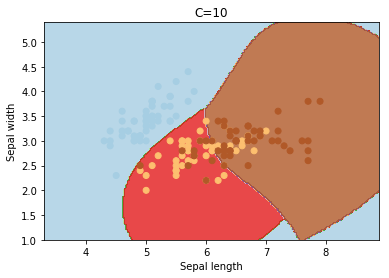

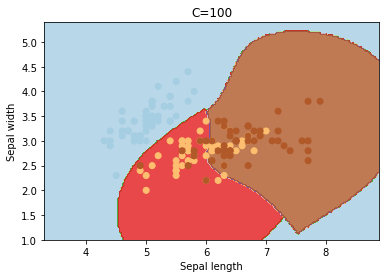

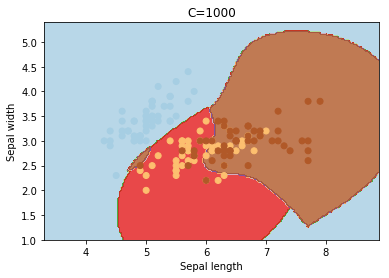

In [10]:
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C=' + str(c))

Increasing C values may lead to overfitting the training data.

## degree

degree is a parameter used when kernel is set to 'poly'. It's basically the degree of the polynomial used to find the hyperplane to split the data.

In [11]:
degrees = [0, 1, 2, 3, 4, 5, 6]

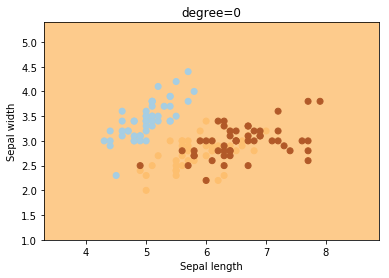

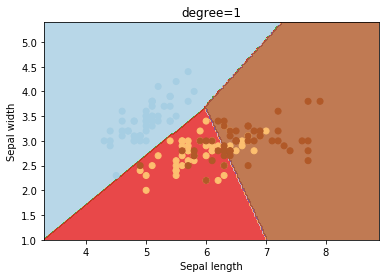

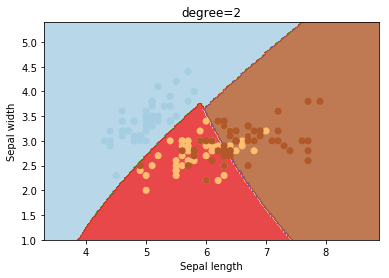

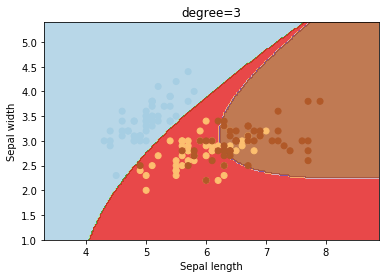

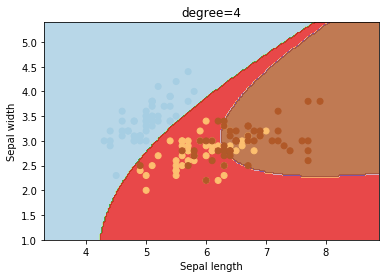

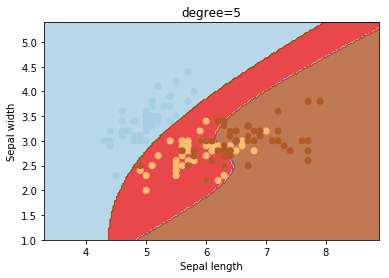

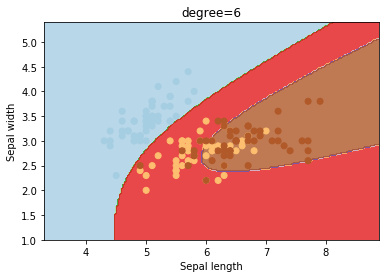

In [12]:
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
    plotSVC('degree=' + str(degree))

Used degree=1 is the same as using a 'linear' kernel. Also, increasing this parameters leads to higher training times.